In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
mnist= tf.keras.datasets.mnist

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [4]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [5]:
print(x_train[8])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   5  63 197   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 230  24   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 254  48   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20 254 255  4

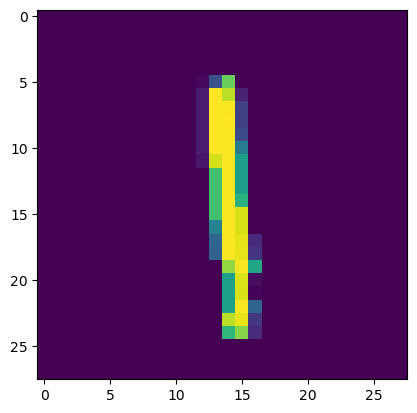

In [6]:
plt.imshow(x_train[8])

In [7]:
print(y_train[8])

1


In [8]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [9]:
x_train=x_train.astype(float)/255.0
x_test=x_test.astype(float)/255.0

In [10]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer,Conv2D,MaxPooling2D,Flatten ,Dense

In [13]:
model = Sequential()
model.add(InputLayer(input_shape=(28,28,1)))
model.add(Conv2D(filters=10,kernel_size=3,strides=(1,1),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=10,kernel_size=3,strides=(1,1),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=10,kernel_size=3,strides=(1,1),padding='valid',activation='softmax'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 10)        910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 10)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 10)          910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 10)         0

In [15]:
import tensorflow
model.compile(optimizer='adam',loss=tensorflow.keras.losses.categorical_crossentropy,metrics=['acc'])

In [16]:
x_train=x_train.reshape((60000,28,28,1))
x_test=x_test.reshape((10000,28,28,1))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [17]:
history=model.fit(x_train,y_train,epochs=30,batch_size=512,validation_data=(x_test,y_test))

Epoch 1/30
118/118 [==============================] - 47s 375ms/step - loss: 1.9997 - acc: 0.3126 - val_loss: 1.3222 - val_acc: 0.6451
Epoch 2/30
118/118 [==============================] - 76s 646ms/step - loss: 0.8250 - acc: 0.7609 - val_loss: 0.5259 - val_acc: 0.8393
Epoch 3/30
118/118 [==============================] - 78s 664ms/step - loss: 0.4569 - acc: 0.8604 - val_loss: 0.3708 - val_acc: 0.8876
Epoch 4/30
118/118 [==============================] - 117s 994ms/step - loss: 0.3576 - acc: 0.8905 - val_loss: 0.3030 - val_acc: 0.9082
Epoch 5/30
118/118 [==============================] - 79s 675ms/step - loss: 0.3010 - acc: 0.9074 - val_loss: 0.2517 - val_acc: 0.9218
Epoch 6/30
118/118 [==============================] - 58s 494ms/step - loss: 0.2655 - acc: 0.9180 - val_loss: 0.2277 - val_acc: 0.9288
Epoch 7/30
118/118 [==============================] - 53s 451ms/step - loss: 0.2376 - acc: 0.9273 - val_loss: 0.2081 - val_acc: 0.9353
Epoch 8/30
118/118 [==============================] - 

In [22]:
y_predict = model.predict(x_test)
y_predict

313/313 [==============================] - 6s 19ms/step


array([[2.1887781e-01, 8.5547239e-01, 9.5594430e-01, ..., 9.9996918e-01,
        5.1982724e-03, 3.6482260e-01],
       [8.3643153e-02, 2.1507491e-01, 9.9719661e-01, ..., 2.1309808e-03,
        1.7153260e-01, 4.5670290e-06],
       [1.0431518e-01, 9.9726039e-01, 9.3749113e-02, ..., 6.9304533e-02,
        1.4095512e-02, 3.0438618e-03],
       ...,
       [4.7418303e-04, 9.9783167e-02, 2.4249468e-02, ..., 3.3752121e-02,
        1.3335867e-02, 2.0860358e-01],
       [6.8868798e-01, 1.8661071e-03, 2.9460909e-02, ..., 1.7937258e-02,
        8.2393032e-01, 6.8115187e-01],
       [2.0092310e-01, 8.7380670e-02, 9.7365659e-01, ..., 8.1146299e-04,
        3.6978456e-01, 2.3522375e-06]], dtype=float32)

In [23]:
y_predict[0]

array([2.1887781e-01, 8.5547239e-01, 9.5594430e-01, 7.9136837e-01,
       5.9515964e-03, 5.3741459e-02, 2.9202141e-08, 9.9996918e-01,
       5.1982724e-03, 3.6482260e-01], dtype=float32)

In [25]:
import numpy as np

In [27]:
np.argmax(y_predict[0])

7

In [28]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [18]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [19]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

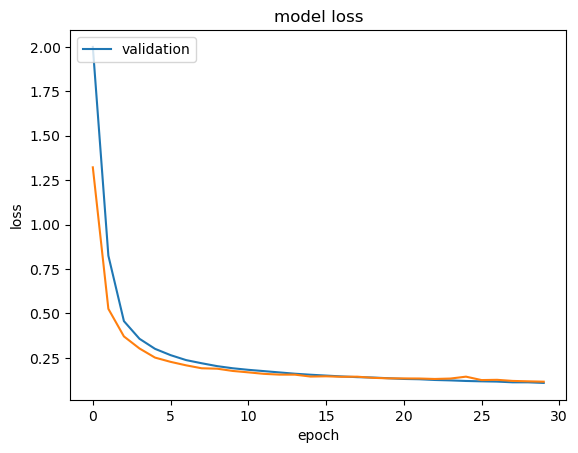

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.legend(['validation'],loc='upper left')
plt.show()

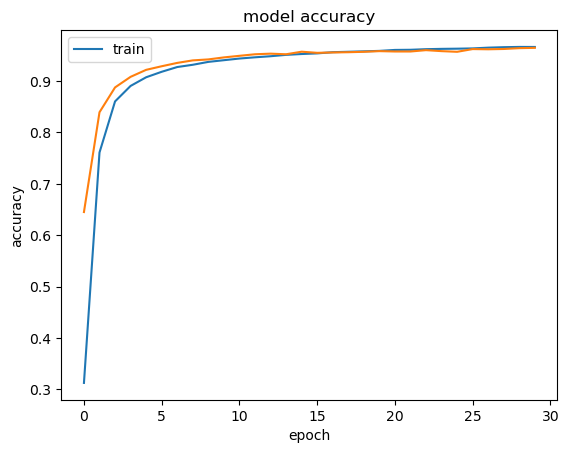

In [21]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()